In [1]:
#!/usr/bin/python

import numpy as np
import pyfits
import os
import environment_utils as envutils
from scipy.stats import chisquare
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from matplotlib import rc, rcParams

# Make use of TeX
rc('text',usetex=True)

# Change all fonts to 'Computer Modern'
rc('font',**{'family':'serif','serif':['Computer Modern']})

In [2]:
envnames = ['Void', 'Sheet', 'Filament', 'Knot']
envcolors = ['red', 'green', 'blue', 'gold']

esdnames = ['esd_total', 'esd_cen', 'esd_sat', 'esd_host', 'esd_2halo']
esdcolors = ['black', 'blue', 'red', 'purple', 'green']

massnames = ['Mcen', 'Msat', 'Mavg', 'fc_cen', 'A_2halo'] # With both free
masscolors = ['blue', 'red', 'black', 'skyblue', 'green']

plotlabels = ['Average ESD', 'Central', 'Satellite', 'Host', '2-halo term']
masslabels = ['Mcen', 'Msat', 'Mavg', 'fc(cen)', 'A2h']

#filename = '/disks/shear10/brouwer_veersemeer/mcmc_output/environment_mcmc_output_fc_A2halo_rankBCG1'
filename = '/disks/shear10/brouwer_veersemeer/mcmc_output/environment_mcmc_output_fc_A2halo' # Free 2-halo, free fc

burn = 10000
#burn = 0

In [3]:
# Import MCMC results
mcmc, end, mcmcname, headername, mcmcmask = envutils.import_mcmc(filename, burn)
print 'Samples: Created = %i, Burned = %i, Used = %i'%(end, burn, len(mcmc['Mcen1']))
print

# Import ESD profiles
esdfiles, covfile, inputparams, acfrac = envutils.read_header(headername)
print 'Input parameters:', np.sort(inputparams.keys())

# Importing the ESD profiles
data_x, data_y, error_h, error_l = envutils.read_esdfiles(esdfiles)


Importing MCMC results: /disks/shear10/brouwer_veersemeer/mcmc_output/environment_mcmc_output_fc_A2halo.fits
                   and: /disks/shear10/brouwer_veersemeer/mcmc_output/environment_mcmc_output_fc_A2halo.hdr
Samples: Created = 50000, Burned = 10000, Used = 40000

Input parameters: ['Mstar' 'fc_sat' 'fsat' 'zgal']
Imported ESD profiles: 4


Written: ESD profile plot: /disks/shear10/brouwer_veersemeer/mcmc_output/environment_mcmc_output_fc_A2halo.pdf


/usr/lib64/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


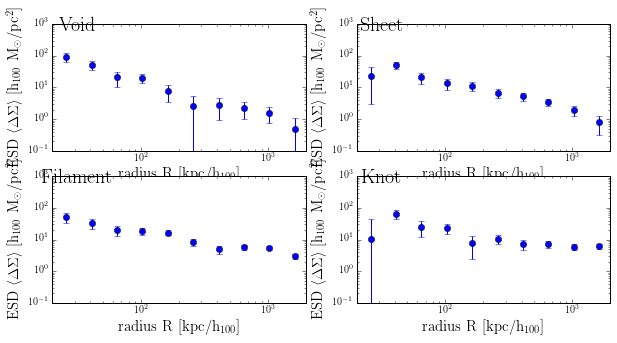

In [4]:
# Create a plot of the ESD profiles and halo model fit

# Define the labels for the plot
h=1
xlabel = r'radius R [kpc/h$_{%g}$]'%(h*100)
ylabel = r'ESD $\langle\Delta\Sigma\rangle$ [h$_{%g}$ M$_{\odot}$/pc$^2$]'%(h*100)

Nrows = 2
Ncolumns = 2

for env in xrange(len(envnames)):

    plt.figure(1, figsize=(10, 5))
    Nsubplot = 100*Nrows+10*Ncolumns+(env+1)
    plt.subplot(Nsubplot)
        
    # Plot the ESD profile
    (error_l[env])[(error_l[env])>=data_y[env]] = ((data_y[env][(error_l[env])>=data_y[env]])*0.9999999999)
    plt.errorbar(data_x, data_y[env], yerr=[error_l[env], error_h[env]], ls='', marker='o', color = 'blue')
    plt.ylabel(r'%s'%ylabel,fontsize=15)
    plt.xlabel(r'%s'%xlabel,fontsize=15)
    
    plt.title(envnames[env], fontsize=20, x = 0.1, y = 0.9)

    
    #plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xscale('log', fontsize=15)
    plt.yscale('log', fontsize=15)
            
    plt.autoscale(enable=False, axis='both', tight=None)
    plt.axis([2e1,2e3,1e-1,1e3])
    plt.ylim(1e-1,1e3)
        
    plt.legend(fontsize=15)


#plt.show()

plotname = '%s.pdf'%filename

plt.savefig(plotname, format='pdf')
print 'Written: ESD profile plot:', plotname

#plt.clf


0
1
2
3


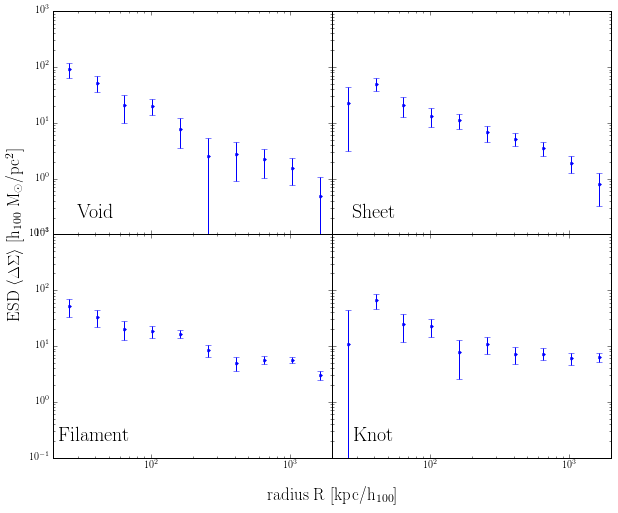

In [5]:
from matplotlib import gridspec
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Define the labels for the plot
h=1
xlabel = r'radius R [kpc/h$_{%g}$]'%(h*100)
ylabel = r'ESD $\langle\Delta\Sigma\rangle$ [h$_{%g}$ M$_{\odot}$/pc$^2$]'%(h*100)

Nrows = 2
Ncolumns = 2

# Plotting the ueber matrix
fig = plt.figure(figsize=(10,8))
canvas = FigureCanvas(fig)

gs_full = gridspec.GridSpec(1,1)
gs = gridspec.GridSpecFromSubplotSpec(Nrows, Ncolumns, wspace=0, hspace=0, subplot_spec=gs_full[0,0])

ax = fig.add_subplot(gs_full[0,0])

for N1 in xrange(Nrows):
    for N2 in xrange(Ncolumns):
        
        env = N1*Nrows + N2
        print env
        
        (error_l[env])[(error_l[env])>=data_y[env]] = ((data_y[env][(error_l[env])>=data_y[env]])*0.9999999999)

        ax_sub = fig.add_subplot(gs[N1, N2])
        ax_sub.errorbar(data_x, data_y[env], yerr=[error_l[env], error_h[env]], ls='', marker='.', color = 'blue')

        ax_sub.xaxis.set_label_position('top')
        ax_sub.yaxis.set_label_position('right')

        ax.tick_params(labelleft='off', labelbottom='off', top='off', bottom='off', left='off', right='off')
                
        if N2 != 0:
            ax_sub.tick_params(axis='y', labelleft='off')
        if N2 == Ncolumns-1:
            ax_sub.set_xticks(np.arange(9.,12.,0.5))
        else:
            ax_sub.set_xticks(np.arange(9.,11.5,0.5))
        
        
        plt.autoscale(enable=False, axis='both', tight=None)
        plt.axis([2e1,2e3,1e-1,1e3])
        plt.ylim(1e-1,1e3)
        plt.xscale('log', fontsize=15)
        plt.yscale('log', fontsize=15)
        
            
        plt.title(envnames[env], fontsize=20, x = 0.15, y = 0.05)
        
# Define the labels for the plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.xaxis.label.set_size(17)
ax.yaxis.label.set_size(17)



In [10]:
rmin = 0
#rmin = 5
#rmax = rmin + 5
rmax = 10

for i in np.arange(len(envnames)):
    for j in np.arange(i+1, len(envnames)):
        print i, j
        
        chi2 = np.sum((data_y[i,rmin:rmax] - data_y[j,rmin:rmax])**2 / (error_h[i,rmin:rmax]**2 + error_h[j,rmin:rmax]**2))
        p = 1 - scipy.stats.chi2.cdf(chi2, 9)
        print 'chi2:', chi2, 'P(>chi2)', p, 'Independent:', p < 0.05
        print
#        obs = ((data_y[i] - data_y[j])**2)**0.5
#        exp = (error_h[i]**2 + error_h[j]**2)**0.5
        #chi2 = np.sum((obs - exp)**2 / exp)
#        chi2 = np.sum(obs/exp)
#        print 'Self:', chi2
        
#        chi2, p = chisquare(obs, f_exp=exp)
#        print 'Python:', chi2, p, p < 0.05
#        print


0 1
chi2: 8.81757600634 P(>chi2) 0.454281260102 Independent: False

0 2
chi2: 38.6003837066 P(>chi2) 1.35974206857e-05 Independent: True

0 3
chi2: 42.1479864378 P(>chi2) 3.08802908766e-06 Independent: True

1 2
chi2: 31.5402909765 P(>chi2) 0.000239034675534 Independent: True

1 3
chi2: 32.3724260823 P(>chi2) 0.000171660150092 Independent: True

2 3
chi2: 13.9115039851 P(>chi2) 0.125508209031 Independent: False



In [7]:
# A chi-squared probability of less than or equal to 0.05
# is commonly interpreted as justification for rejecting the null hypothesis 
# that the row variable is independent of the column variable

#p < 0.05 = not independent
#p > 0.05 = independent